In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing Iris Dataset

Importing the dataset and creating a dataframe, printing the head to see the dataset.

In [5]:
orig_df = pd.read_csv("/content/drive/MyDrive/csv_files/Iris.csv")
df = orig_df
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Printing the shape to see the size of the dataset

In [6]:
df.shape

(150, 6)

Checking info of the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Cleaning and preprocessing

Renaming the columns.

In [8]:
df = df.rename(columns={
                        'Id':'id',
                        'SepalLengthCm':'sepal_length_cm',
                        'SepalWidthCm':'sepal_width_cm',
                        'PetalLengthCm':'petal_length_cm',
                        'PetalWidthCm':'petal_width_cm',
                        'Species':'species'
                        })

checking for null values

In [9]:
df.isnull().sum()

id                 0
sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
species            0
dtype: int64

Since there are no null values and the dataset is clean we will look at the dataset using describe

In [10]:
df.describe()

,id,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Now we will look at any duplicates in dataframe since our dataset is small.

In [11]:


data = df.drop_duplicates(subset ="species",)
data

,id,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [12]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Since we know that there are three species categories we will find the counts of each species

In [13]:
df.value_counts('species')

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Visualisation of the dataset

Now we will try to visualise our dataset using sns and matplotlib libraries. Our goal is to observe relationship between the variables

<ipython-input-14-7faa7ec6e501>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species',data=df, palette = 'Set1')


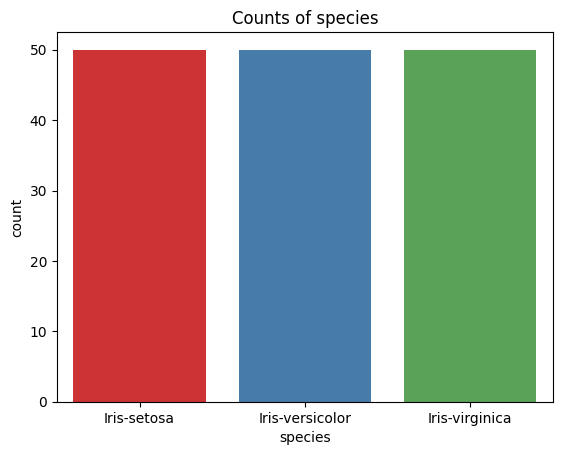

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='species',data=df, palette = 'Set1')

plt.title('Counts of species')
plt.show()

Now we will observe the relationship between sepal length and sepal width and also followed by petal length and petal width


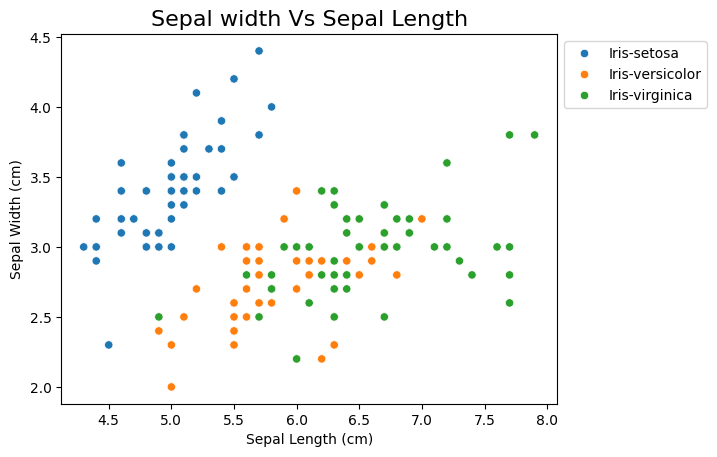

In [15]:
sns.scatterplot(x = 'sepal_length_cm', y = 'sepal_width_cm', hue = 'species', data = df,)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.title('Sepal width Vs Sepal Length', size = 16)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')


plt.show()


The key observations from this scatter plot


*   Setosa species has smaller Sepal length but larger Sepal Width
*   Versicolor lies in the middle of both and tends to have generally lower width and higher length.
* Virginica species has larger lengths but smaller widths.

Now we will be comparing the petal lengths and width similarly






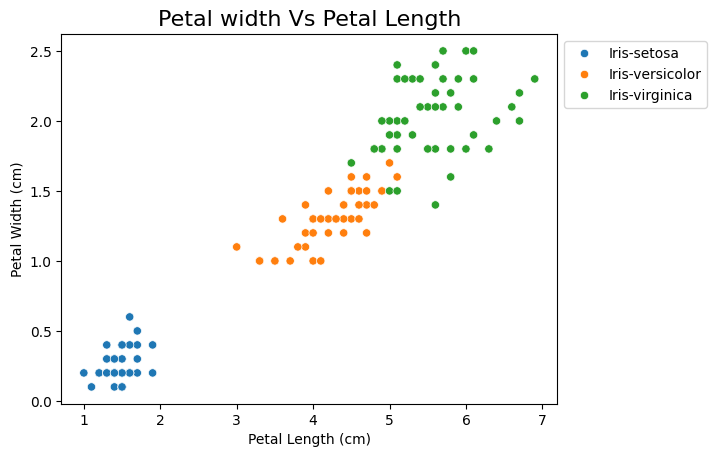

In [16]:
sns.scatterplot(x = 'petal_length_cm', y = 'petal_width_cm', hue = 'species', data = df,)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.title('Petal width Vs Petal Length', size = 16)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')


plt.show()

As we can observe, there is clear distinction between petal lengths and widths of each species

* Setosa has the smallest petal length and width
*Versicolor lies in the middle but has bigger petals than setosa
*Virginica has the biggest petals both in terms of petal length and width

Now we will make use of pair plots to compare the the relationships for multivariate analysis


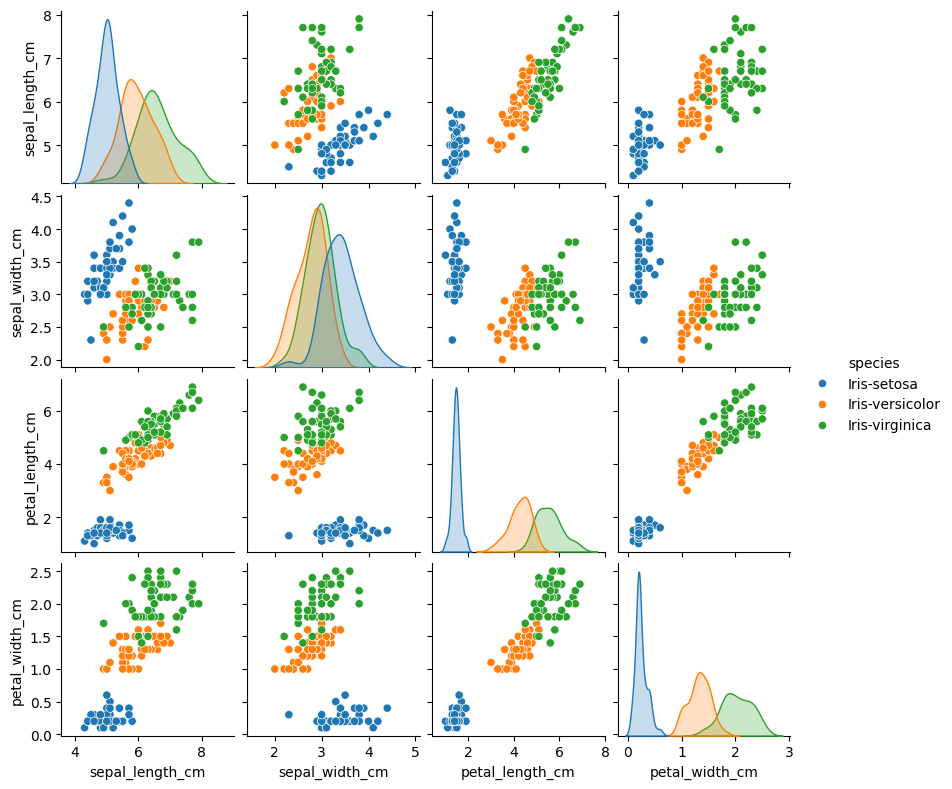

In [17]:
sns.pairplot(df.drop(['id'],axis =1),
             hue = 'species',height = 2)

There are some clear observations that can be made here, the species setosa has the smallest overall petal lengths and widths, it also has smaller sepal lengths but greater sepal widths. Virginica tends to have generally bigger lengths and widths than the other categories.

# Histograms

the use of histograms will allow us to see the distributio of data for various columns, it can be used for uni as well as bi variate analysis.

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <BarContainer object of 6 artists>)

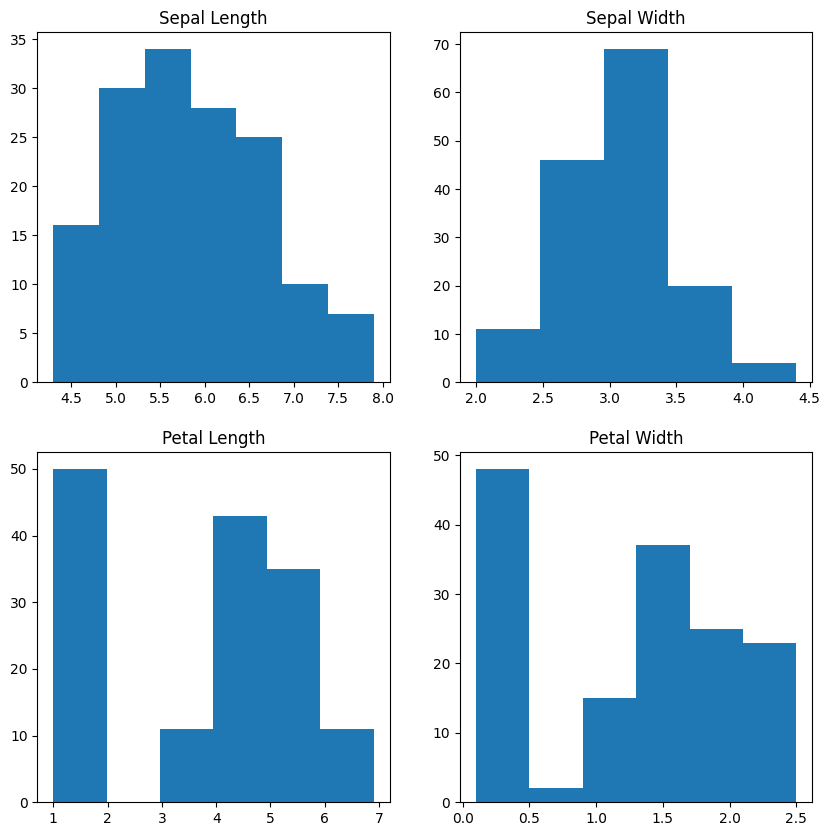

In [18]:
fig, axes = plt.subplots(2,2,figsize=(10,10))

axes[0,0].set_title('Sepal Length')
axes[0,0].hist(df['sepal_length_cm'],bins=7)

axes[0,1].set_title('Sepal Width')
axes[0,1].hist(df['sepal_width_cm'],bins=5)

axes[1,0].set_title('Petal Length')
axes[1,0].hist(df['petal_length_cm'],bins=6)

axes[1,1].set_title('Petal Width')
axes[1,1].hist(df['petal_width_cm'],bins=6)

There are a few key observations to be made here


*   The highest sepal length lies between 30-35 which is between 5.5-6
*  The highest sepal width is around 70 which is betwen 3-3.5
*The highest petal length is around 50 which is around 1-2
*The highest frequency of Petal width is between 40-50 which is between 0.0-0.05.




# Histograms and Distplots
Distplot is used basically for the univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

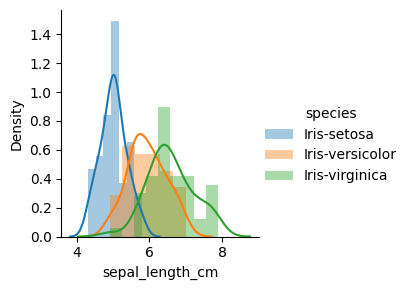

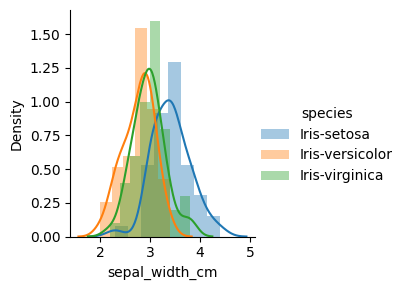

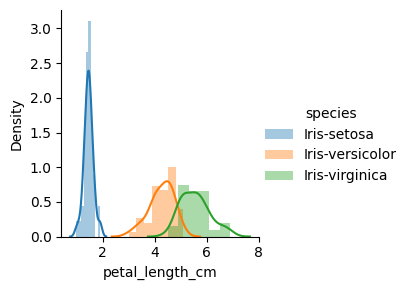

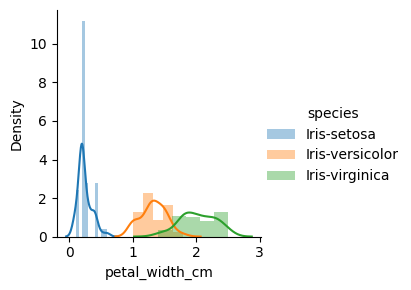

In [19]:
plot = sns.FacetGrid(df,hue='species')
plot.map(sns.distplot,"sepal_length_cm").add_legend()

plot = sns.FacetGrid(df,hue='species')
plot.map(sns.distplot,"sepal_width_cm").add_legend()

plot = sns.FacetGrid(df,hue='species')
plot.map(sns.distplot,"petal_length_cm").add_legend()

plot = sns.FacetGrid(df,hue='species')
plot.map(sns.distplot,"petal_width_cm").add_legend()

plt.show()


From the above plots, we can see that –

* In the case of Sepal Length, there is a huge amount of
overlapping.
* In the case of Sepal Width also, there is a huge amount of overlapping.
* In the case of Petal Length, there is a very little amount of overlapping.
* In the case of Petal Width also, there is a very little amount of overlapping.

So we can use Petal Length and Petal Width as the classification feature.

# Finding Correlation

We will use heatmaps to find the correlation.

In [20]:
print(data.dtypes)

id                   int64
sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
species             object
dtype: object


In [21]:
data = data.drop('species', axis=1)

In [22]:
data.corr(method='pearson')

,id,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
id,1.000000,0.624413,-0.654654,0.969909,0.999685
sepal_length_cm,0.624413,1.000000,-0.999226,0.795795,0.643817
sepal_width_cm,-0.654654,-0.999226,1.000000,-0.818999,-0.673417
petal_length_cm,0.969909,0.795795,-0.818999,1.000000,0.975713
petal_width_cm,0.999685,0.643817,-0.673417,0.975713,1.000000


The heatmap is a data visualization technique that is used to analyze the dataset as colors in two dimensions. Basically, it shows a correlation between all numerical variables in the dataset. In simpler terms, we can plot the above-found correlation using the heatmaps.

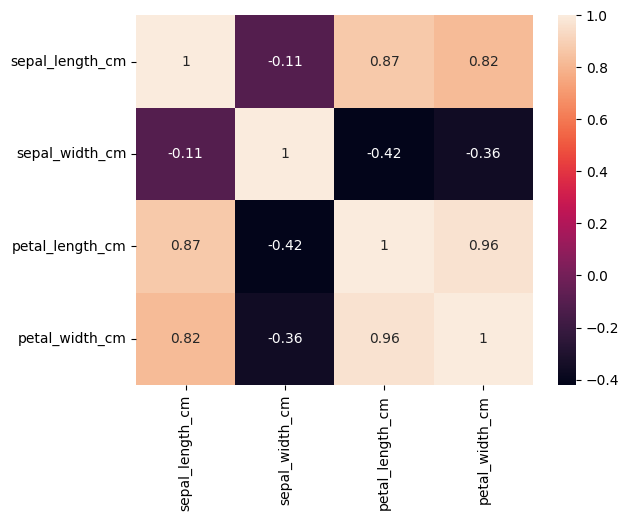

In [23]:
new_df = df.drop('species', axis=1)
sns.heatmap(new_df.corr(method='pearson').drop(['id'],axis = 1).drop(['id'],axis = 0),annot = True);
plt.show()

We can observe that:

*   Petal lenght and petal width have high correlation
*   Petal len and sepal len have high corr
*   Petal width and sepal len have a good corr



Now moving on to box plots



# Box Plots

We can use boxplots to see how the categorical value os distributed with other numerical values.



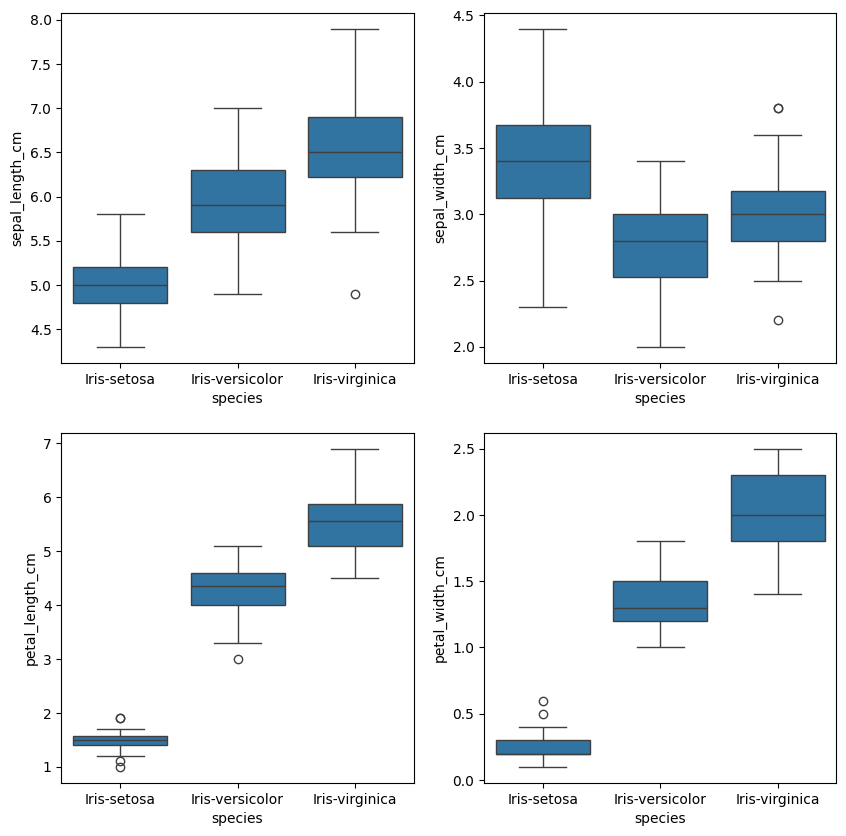

In [24]:


def graph(y):
  sns.boxplot(x = "species", y=y, data = df)
plt.figure(figsize = (10,10))

plt.subplot(221)
graph('sepal_length_cm')

plt.subplot(222)
graph('sepal_width_cm')

plt.subplot(223)
graph('petal_length_cm')

plt.subplot(224)
graph('petal_width_cm')

plt.show()


* Species Setosa has the smallest features and less distributed with some outliers.
* Species Versicolor has the average features.
* Species Virginica has the highest features

However this has outliers and outliers can deviate us from the actual results. Hence they should be removed or dropped or capped off to get more accurate results


# Handling Outliers

<Axes: xlabel='sepal_width_cm'>

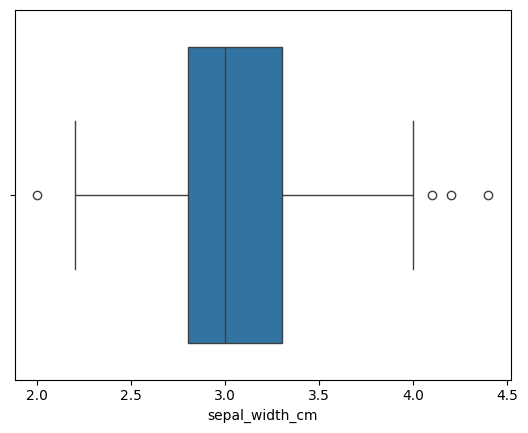

In [25]:
sns.boxplot(x = 'sepal_width_cm', data=df)

The values above 4 and below 2 are acting as outliers.

We must remove the outliers

we can do this by examining the IQR

Old Shape:  (150, 6)
New Shape:  (146, 6)


<Axes: xlabel='sepal_width_cm'>

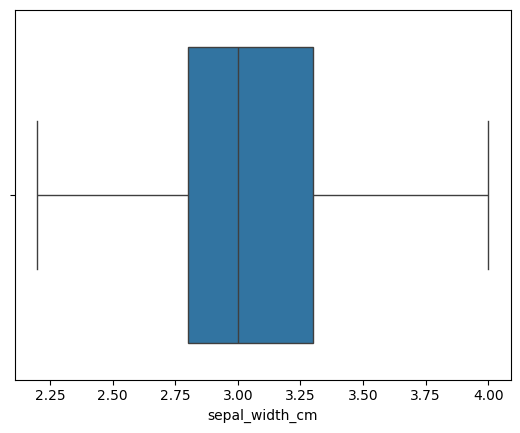

In [28]:
import sklearn

q1 = np.percentile(df['sepal_width_cm'],25, interpolation = 'midpoint')
q3 = np.percentile(df['sepal_width_cm'],75,interpolation = 'midpoint')

IQR = q3-q1

print('Old Shape: ', df.shape)

upper = np.where(df['sepal_width_cm'] >= (q3 + 1.5*IQR))

lower = np.where(df['sepal_width_cm'] <= (q1 - 1.5*IQR))

df.drop(upper[0],inplace = True)
df.drop(lower[0], inplace = True)

print('New Shape: ',df.shape)

sns.boxplot(x = 'sepal_width_cm', data = df)

Hence we can observe that the outliers in the sepal width have been removed and the new box plot seems better than the original one.